In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('gss2012.csv')

In [3]:
raw.shape

(1974, 221)

In [4]:
raw[:3]

,year,id,wrkstat,wrkslf,wrkgvt,marital,sibs,childs,age,educ,...,south,divlaw2,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,age2,relig2,dem,science_quiz.f
0,2012,1.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,1.0,0.0,22.0,4 years,...,Nonsouth,More difficult,22.0,0.0,0.0,NaN,<=30,Catholic,0.0,NaN
1,2012,2.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,2.0,0.0,21.0,12th grade,...,Nonsouth,NaN,21.0,0.0,0.0,100.0,<=30,Catholic,0.0,7.0
2,2012,3.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Married,1.0,2.0,42.0,12th grade,...,Nonsouth,NaN,42.0,1.0,100.0,100.0,>=31,Protestant,0.0,10.0


# First Part Population Analysis
Tried to grasp what actually we have in the data from a population point of view, the first step to understand the basic information such as age, gender, workstatus, how many children they have, what is the political point of view the have.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


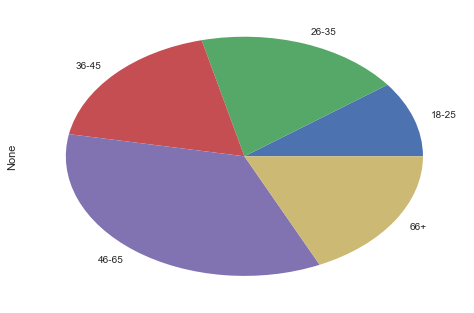

In [5]:
mask1 = raw['age'].notnull()
df1 = raw[mask1]
df1['bins'] = pd.cut(df1['age'],bins=[17,25,35,45, 65, 120], labels=["18-25","26-35","36-45", "46-65", "66+"])
df1.groupby('bins').size().plot.pie()
plt.show()

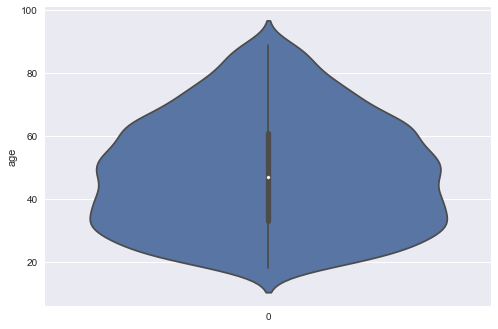

In [6]:
sns.violinplot(data=df1['age'])
plt.ylabel('age')
plt.show()

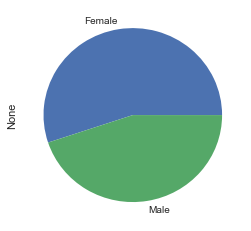

In [7]:
mask2 = raw['sex'].notnull()
df2 = raw[mask2]
df2.groupby('sex').size().plot.pie(figsize=(4,4))
plt.show()

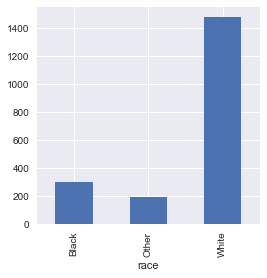

In [8]:
mask12 = raw['race'].notnull()
df12 = raw[mask12]
df12.groupby('race').size().plot.bar(figsize=(4,4))
plt.show()

# Reduced Family Size
We see a very interesting facts here that most people have 2-3 sibilings while have 2 children, 
we could observe that family size is reduced, we might be intesting to ask is that the number of sibilings will 
affects how many children they have? A regression might be intesting. While certain level of concern of mising data is 
definitely a salient issue. Why they actually does not report data?

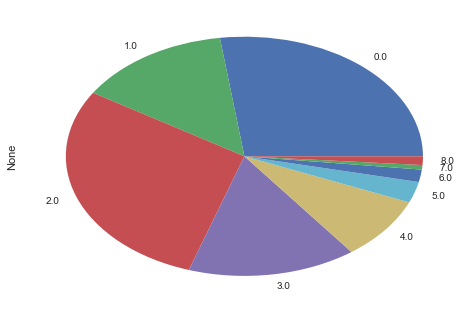

In [9]:
mask3 = raw['childs'].notnull()
df3 = raw[mask3]
df3.groupby('childs').size().plot.pie()
plt.show()

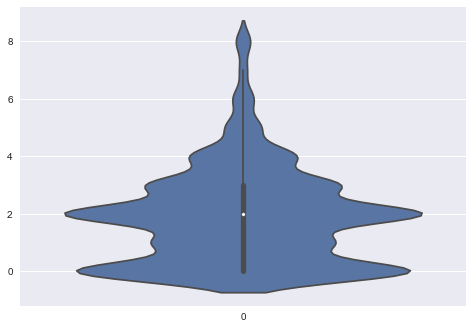

In [10]:
sns.violinplot(data=df3['childs'])
plt.show()

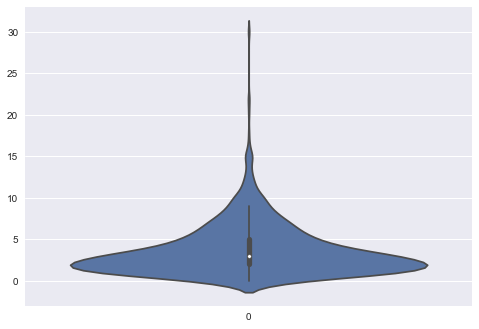

In [11]:
mask4 = raw['sibs'].notnull()
df4 = raw[mask4]
sns.violinplot(data=df4['sibs'])
plt.show()

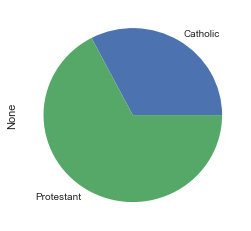

In [12]:
mask5 = raw['relig2'].notnull()
df5 = raw[mask5]
df5.groupby('relig2').size().plot.pie(figsize=(4,4))
plt.show()

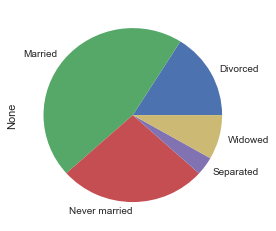

In [13]:
mask6 = raw['marital'].notnull()
df6 = raw[mask6]
df6.groupby('marital').size().plot.pie(figsize=(4,4))
plt.show()

# Work Related Stats
the results seems amazing at begining, but afterwards we find that its actually the 
in accordance with government size: Federal, state and local governments employ 22.2 million workers nationwide 
equaling 16.7 percent of the U.S. workforce of 132.7 million 

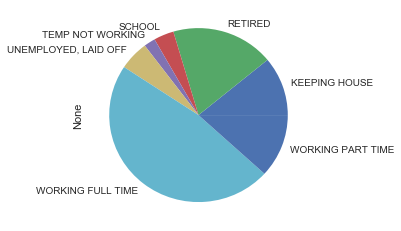

In [14]:
mask7 = raw['wrkstat'].notnull()
df7 = raw[mask7]
df7.groupby('wrkstat').size().plot.pie(figsize=(4,4))
plt.show()

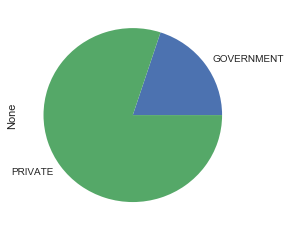

In [15]:
mask8 = raw['wrkgvt'].notnull()
df8 = raw[mask8]
df8.groupby('wrkgvt').size().plot.pie(figsize=(4,4))
plt.show()

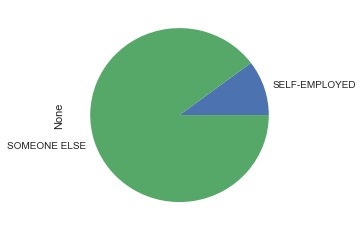

In [16]:
mask9 = raw['wrkslf'].notnull()
df9 = raw[mask9]
df9.groupby('wrkslf').size().plot.pie(figsize=(4,4))
plt.show()

# Education Related Stat

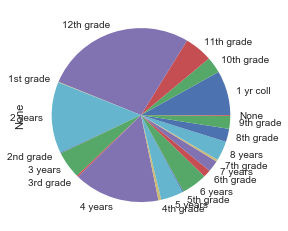

In [17]:
mask10 = raw['educ'].notnull()
df10 = raw[mask10]
df10.groupby('educ').size().plot.pie(figsize=(4,4))
plt.show()

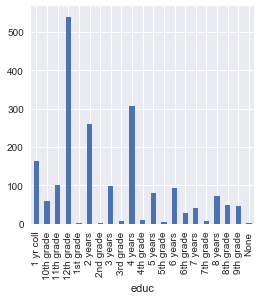

In [18]:
mask10 = raw['educ'].notnull()
df10 = raw[mask10]
df10.groupby('educ').size().plot.bar(figsize=(4,4))
plt.show()

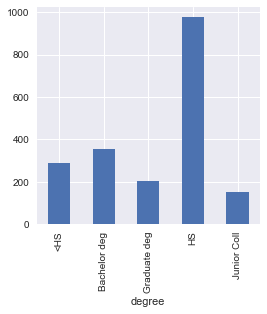

In [19]:
mask11 = raw['degree'].notnull()
df11 = raw[mask11]
df11.groupby('degree').size().plot.bar(figsize=(4,4))
plt.show()

## Poltical View Related Statistics

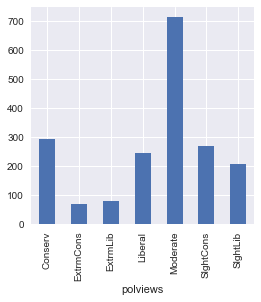

In [20]:
mask13 = raw['polviews'].notnull()
df13 = raw[mask13]
df13.groupby('polviews').size().plot.bar(figsize=(4,4))
plt.show()

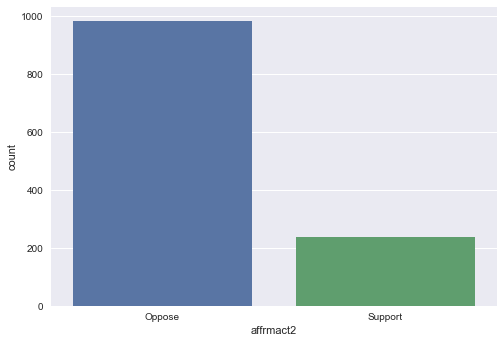

In [21]:
sns.countplot(x='affrmact2', data=raw)
plt.show()

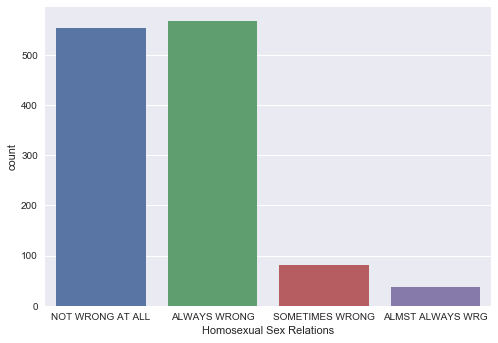

In [22]:
sns.countplot(x='homosex', data=raw)
plt.xlabel('Homosexual Sex Relations')
plt.show()

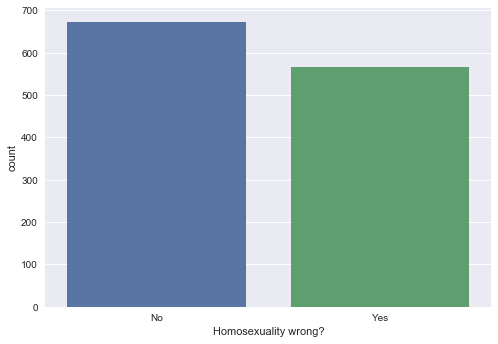

In [23]:
sns.countplot(x='homosex2', data=raw)
plt.xlabel('Homosexuality wrong?')
plt.show()

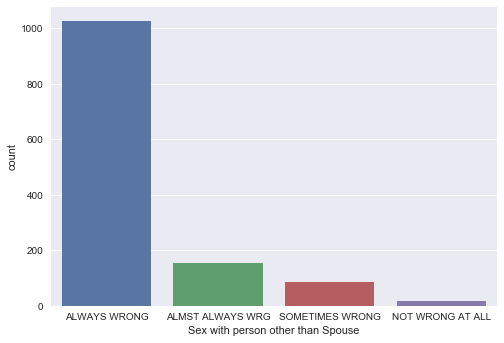

In [24]:
sns.countplot(x='xmarsex', data=raw)
plt.xlabel('Sex with person other than Spouse')
plt.show()

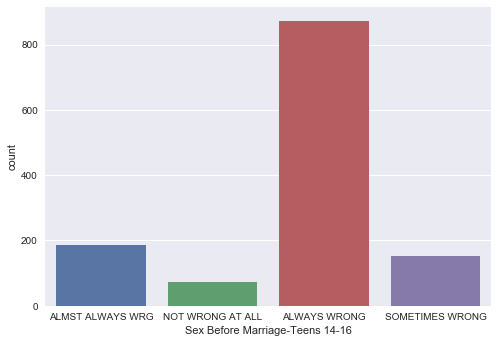

In [25]:
sns.countplot(x='teensex', data=raw)
plt.xlabel('Sex Before Marriage-Teens 14-16')
plt.show()

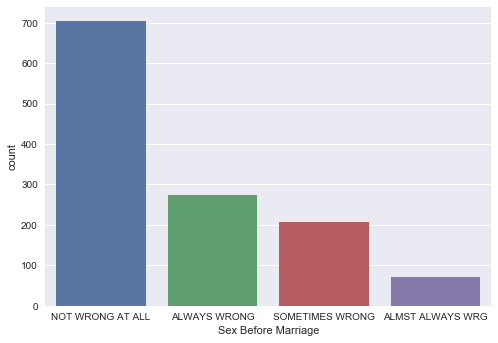

In [26]:
sns.countplot(x='premarsx', data=raw)
plt.xlabel('Sex Before Marriage')
plt.show()

# Income Distribution
I Use standard routine of bar chart at begining, but find that the data is code with text and it is not intuitive of the income distrbution, so I decided to draw a violin plot to show. In order to do so, I must transform the income statistics into a good measure, such as using numerical, maybe a apply function and a dictionary could be a great idea. <br>

The results of the income distribution is somehow surprised to me. Since there are distinct two class of people, one group of people has more or less pyramid structure of income, with a mode maybe around 25,000 and median around 30,000. While there is another group of people with median income around 150,000. This may due to the fact there are many data are missing or the sample is not representative. This needs careful examination.

In [27]:
mask14 = raw['income06'].notnull()
df14 = raw[mask14]
df14['income06'].unique()

array(['$150000 OR OVER', '$110000 TO $129999', '$130000 TO $149999',
       '$50000 TO 59999', '$25000 TO 29999', '$30000 TO 34999',
       '$5 000 TO 5 999', 'UNDER $1 000', '$8 000 TO 9 999',
       '$22500 TO 24999', '$40000 TO 49999', '$60000 TO 74999',
       '$90000 TO $109999', '$75000 TO $89999', '$35000 TO 39999',
       '$15000 TO 17499', '$20000 TO 22499', '$6 000 TO 6 999',
       '$17500 TO 19999', '$12500 TO 14999', '$10000 TO 12499',
       '$1 000 TO 2 999', '$7 000 TO 7 999', '$4 000 TO 4 999',
       '$3 000 TO 3 999'], dtype=object)

In [28]:
df14['income06'].shape

(1758,)

In [29]:
income_dict = {'$150000 OR OVER':15, '$110000 TO $129999':10, '$130000 TO $149999':13,
       '$50000 TO 59999':5, '$25000 TO 29999':2.5, '$30000 TO 34999':3.0,
       '$5 000 TO 5 999':0.5, 'UNDER $1 000':0.0, '$8 000 TO 9 999':0.8,
       '$22500 TO 24999':2.25, '$40000 TO 49999':4, '$60000 TO 74999':6,
       '$90000 TO $109999':9, '$75000 TO $89999':7.5, '$35000 TO 39999':3.5,
       '$15000 TO 17499':1.5, '$20000 TO 22499':2, '$6 000 TO 6 999':0.6,
       '$17500 TO 19999':1.75, '$12500 TO 14999':1.25, '$10000 TO 12499':1,
       '$1 000 TO 2 999':0.1, '$7 000 TO 7 999':0.7, '$4 000 TO 4 999':0.4,
       '$3 000 TO 3 999':0.3}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


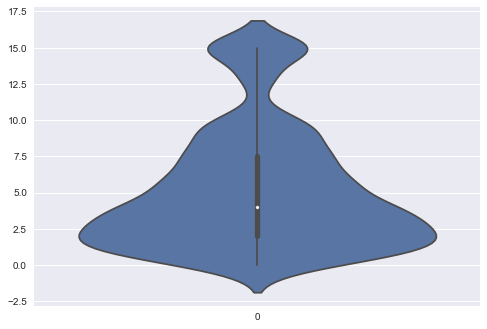

In [30]:
df14['income'] = df14['income06'].apply(lambda x: income_dict[x])
sns.violinplot(data=df14['income'])
plt.show()

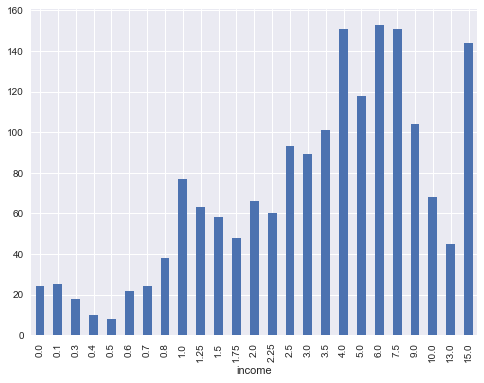

In [31]:
df14.groupby('income').size().plot.bar(figsize=(8,6))
plt.show()

## A Comparison of Family Income

In [32]:
mask15 = raw['rincom06'].notnull()
df15 = raw[mask15]
df15['rincom06'].unique()

array(['$110000 TO $129999', '$30000 TO 34999', '$6 000 TO 6 999',
       '$15000 TO 17499', '$50000 TO 59999', '$40000 TO 49999',
       '$60000 TO 74999', '$90000 TO $109999', '$17500 TO 19999',
       '$8 000 TO 9 999', '$150000 OR OVER', '$20000 TO 22499',
       '$25000 TO 29999', '$75000 TO $89999', '$22500 TO 24999',
       '$4 000 TO 4 999', '$130000 TO $149999', '$7 000 TO 7 999',
       '$10000 TO 12499', '$12500 TO 14999', '$5 000 TO 5 999',
       '$3 000 TO 3 999', '$35000 TO 39999', '$1 000 TO 2 999',
       'UNDER $1 000'], dtype=object)

In [33]:
rincome_dict = {'$110000 TO $129999':11, '$30000 TO 34999':3, '$6 000 TO 6 999':0.6,
       '$15000 TO 17499':1.5, '$50000 TO 59999':5, '$40000 TO 49999':4,
       '$60000 TO 74999':6, '$90000 TO $109999':9, '$17500 TO 19999':1.75,
       '$8 000 TO 9 999':0.8, '$150000 OR OVER':15, '$20000 TO 22499':2,
       '$25000 TO 29999':2.5, '$75000 TO $89999':7.5, '$22500 TO 24999':2.25,
       '$4 000 TO 4 999':0.4, '$130000 TO $149999':13, '$7 000 TO 7 999':0.7,
       '$10000 TO 12499':1, '$12500 TO 14999':1.25, '$5 000 TO 5 999':0.5,
       '$3 000 TO 3 999':0.3, '$35000 TO 39999':3.5, '$1 000 TO 2 999':0.1,
       'UNDER $1 000':0.1}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


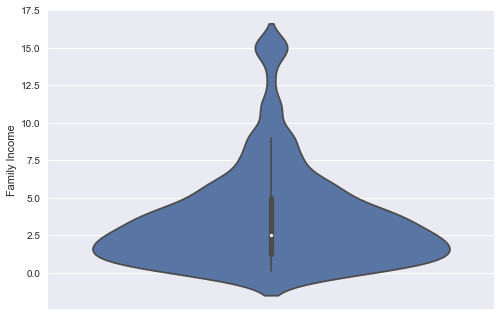

In [34]:
df15['rincome'] = df15['rincom06'].apply(lambda x: rincome_dict[x])
sns.violinplot(y=df15['rincome'])
plt.ylabel('Family Income')
plt.show()

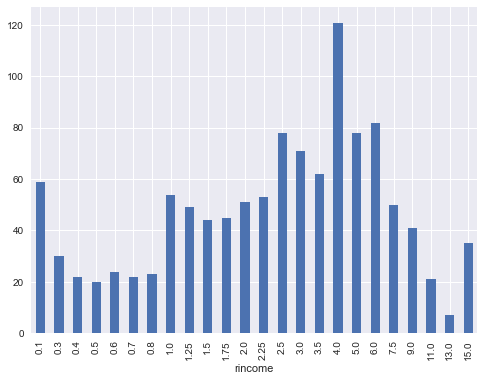

In [35]:
df15.groupby('rincome').size().plot.bar(figsize=(8,6))
plt.show()

In [36]:
mask16 = raw['educ'].notnull()
df16 = raw[mask16]
df16['educ'].unique()

array(['4 years', '12th grade', '1 yr coll', '7 years', '3 years',
       '11th grade', '9th grade', '5 years', '10th grade', '4th grade',
       'None', '2 years', '6 years', '8 years', '8th grade', '6th grade',
       '5th grade', '7th grade', '3rd grade', '1st grade', '2nd grade'], dtype=object)

In [37]:
educ_dict = {'4 years':16, '12th grade':12, '1 yr coll':13, '7 years':19, '3 years':15,
       '11th grade':11, '9th grade':9, '5 years':17, '10th grade':10, '4th grade':4,
       'None':0, '2 years':14, '6 years':18, '8 years':20, '8th grade':8, '6th grade':6,
       '5th grade':5, '7th grade':7, '3rd grade':3, '1st grade':2, '2nd grade':2}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


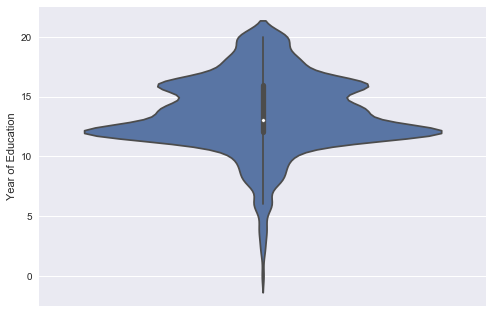

In [38]:
df16['deduc'] = df16['educ'].apply(lambda x: educ_dict[x])
sns.violinplot(y=df16['deduc'])
plt.ylabel('Year of Education')
plt.show()

# Part II Subgroup Comparison Analysis
In the following section, instead of focus on the overall statistics, I want to address the problem for further consideration of the statistics of subgroup of students. For example, I want to ask, what is the difference of the number of children for different races? What is the difference of the income distribution for different race? What is the number of sibling for differencent races?

## Income Inequality between Races
Jugding from the below graph we could clearly see that white has higher median income, and also more people within the range of the higher income quantile, while black people has lower median income and also more people within the range of lower income quantile.

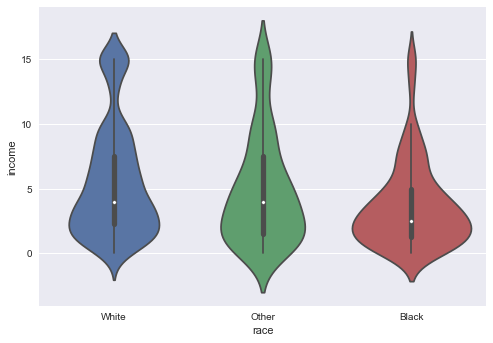

In [39]:
# individual income of different race
sns.violinplot(x='race', y='income', data=df14)
plt.show()

For family income, the median is closer compared to individual income, few of the reason I want to think might be the case. Other income families might have a higher tendency for women to work in order to support familiy. In the top quantile, because white and black candiate might have support from their own race, thus benefit from the system. In top income they stil more significant black and white compared to other races. 

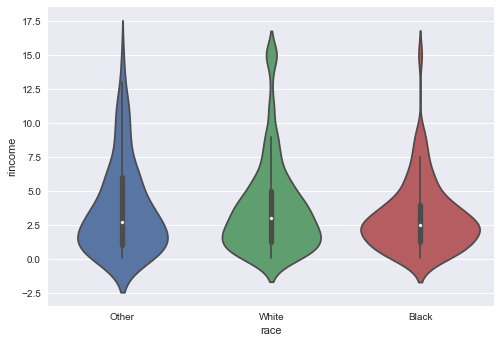

In [40]:
# family income of different race
sns.violinplot(x='race', y='rincome', data=df15)
plt.show()

## Family Difference of different race

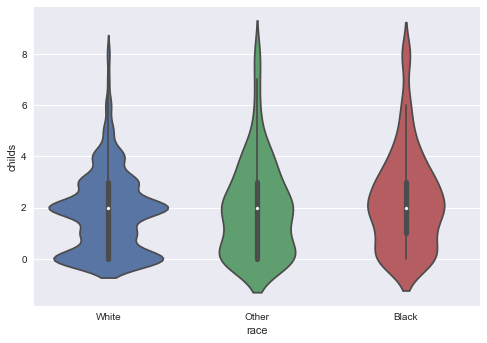

In [41]:
sns.violinplot(x='race', y='childs', data=raw)
plt.show()

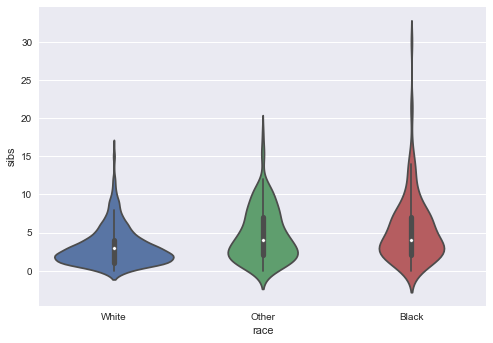

In [42]:
sns.violinplot(x='race', y='sibs', data=raw)
plt.show()

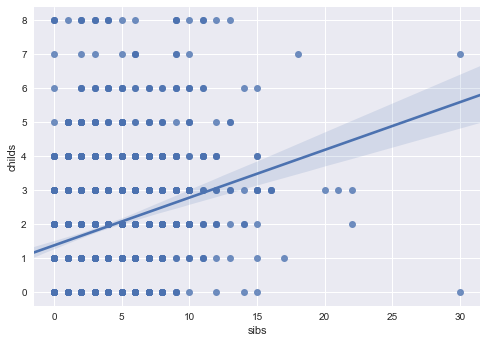

In [43]:
sns.regplot(x='sibs', y='childs', data=raw)
plt.show()

It seems the more sibling one has, the more likely he is going to have more children. Besides this qualitative analysis, we could has a vague judgement of the quantitative side that is due to the magnitude of the x-label and y-label, we could assume that the 1 more siblings could leads to 0.1 more children. In order to confirm this observation, we could run an regression to confirm our analysis.

In [44]:
import statsmodels.formula.api as sm
result = sm.ols(formula="childs ~ sibs", data=raw).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 childs   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           2.07e-31
Time:                        21:19:34   Log-Likelihood:                -3741.3
No. Observations:                1969   AIC:                             7487.
Df Residuals:                    1967   BIC:                             7498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3780      0.057     24.323      0.000       1.267       1.489
sibs           0.1405      0.012     11.865      0.000       0.117       0.164
==============================================================================
Omnibus:                      265.133   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.116
Skew:                           0.921   Prob(JB):                     2.18e-92
Kurtosis:                       4.325   Cond. No.                         7.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In terms of regression on the family side, we see that the one more siblings a person has, it is likely that he has 0.14 more children. It is signifcant at 99.9% level. However, the naive model has a low R-squared which means the variable we choose could not predict the number of children he has very well. We might want to include some of the analysis of race, income should have more explanatory power in further research.

## Education Difference of different races

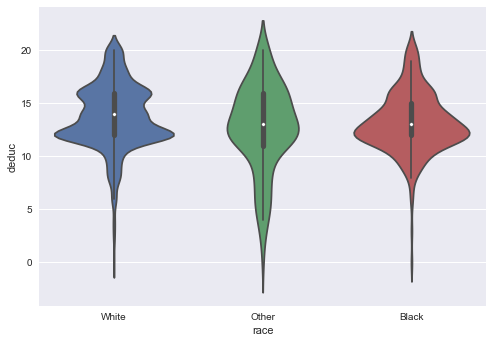

In [45]:
sns.violinplot(x='race', y='deduc', data=df16)
plt.show()

For me there are one of the phenomena most intrigued me, that is there are two groups of white people, for example, in terms of individual income, it has clearly two subrgoup, one group is relative more wealthy, one group is relative poorer, there is much less of a percentage of the white people in between.

## Selected Poltical View Difference Among Races
In the following, I will tried to use graph to show the difference of poltical view of different race.

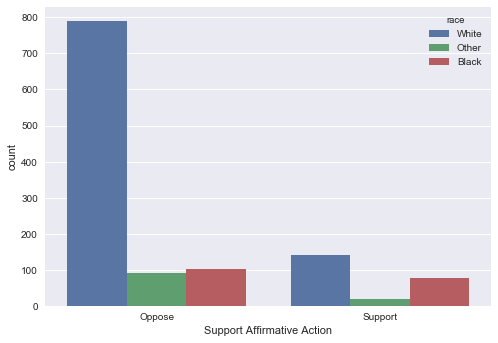

In [46]:
sns.countplot(x='affrmact2', hue='race', data=raw)
plt.xlabel('Support Affirmative Action')
plt.show()

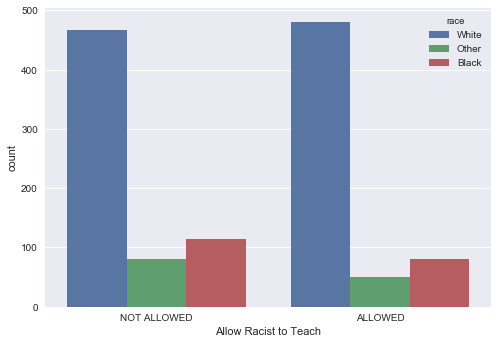

In [47]:
sns.countplot(x='colrac', hue='race', data=raw)
plt.xlabel('Allow Racist to Teach')
plt.show()

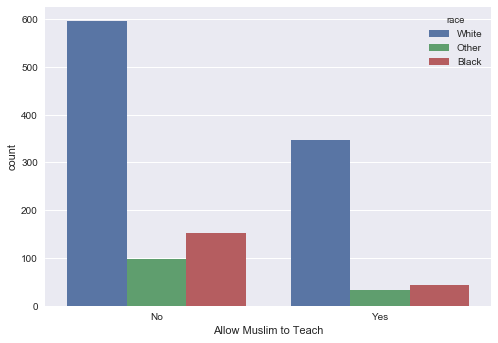

In [48]:
sns.countplot(x='mslm_col', hue='race', data=raw)
plt.xlabel('Allow Muslim to Teach')
plt.show()

# View on Scientific Research and Education Level of Different Party
According to the pew research, half of the republican think that the University are generally bad for USA. We want to use this data to see if this is true or not at the point of this survey. The results showed that the republican are in indeed less likely to support funding of scientific research. However, interestingly republicans actually more likely to benefit from the eductaion system, i.e. more likely to go to the university, more likely to graduate from high school. We could actually see this by using the summary statistics of year of education by subgroup.

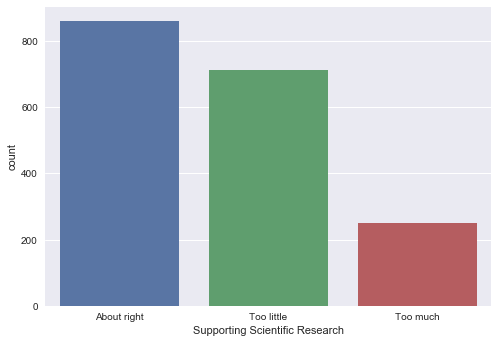

In [49]:
sns.countplot(x='natsci', data=raw)
plt.xlabel('Supporting Scientific Research')
plt.show()

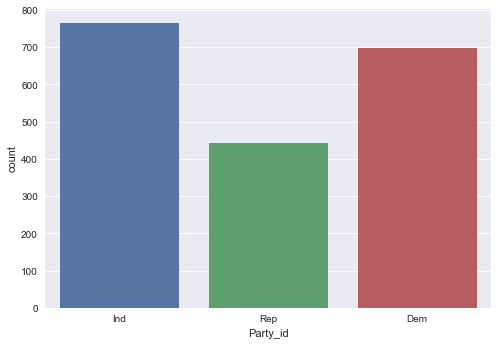

In [50]:
sns.countplot(x='partyid_3', data=raw)
plt.xlabel('Party_id')
plt.show()

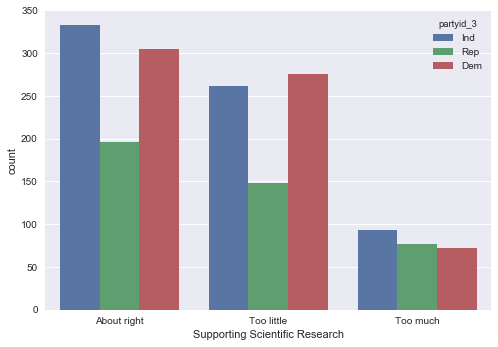

In [51]:
sns.countplot(x='natsci', hue='partyid_3', data=raw)
plt.xlabel('Supporting Scientific Research')
plt.show()

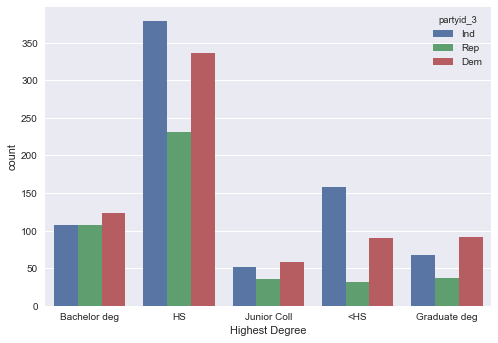

In [52]:
sns.countplot(x='degree', hue='partyid_3', data=raw)
plt.xlabel('Highest Degree')
plt.show()

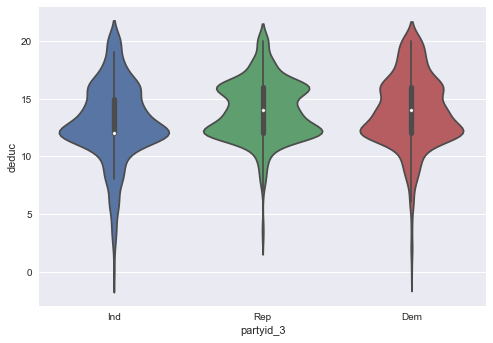

In [53]:
sns.violinplot(y='deduc', x='partyid_3', data=df16)
plt.show()

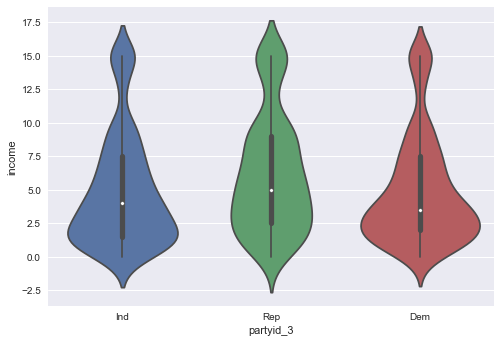

In [54]:
sns.violinplot(y='income', x='partyid_3', data=df14)
plt.show()